In [1]:
import jax
import jax.numpy as jnp
import jax.random as jrandom
import matplotlib.pyplot as plt
from sigformer.instruments.primary import RoughBergomiStock

In [2]:
n_paths = 30000
n_steps = 100
dt = 1.0 / n_steps
a = -0.43
hurst = 0.5 + a
eta = 1.9
xi = 0.235**2
rho = -0.9
s0 = 1.0

In [3]:
rbergomi_stock = RoughBergomiStock(
    hurst=hurst,
    rho=rho,
    xi=xi,
    eta=eta,
    dt=dt,
    forward_offset=15.0 / 100,
)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
def simulate(key):
    return rbergomi_stock.simulate(key, n_steps=n_steps, init_state=(s0, xi, None))

In [5]:
output = jax.vmap(simulate)(jrandom.split(jrandom.PRNGKey(0), n_paths))

In [6]:
S = output["spot"]
V = output["variance"]

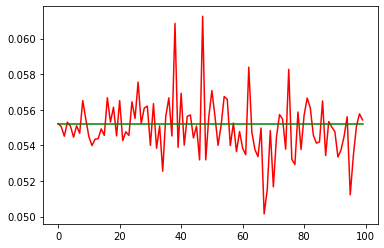

In [7]:
plt.plot(jnp.mean(V, axis=0), "r")
plt.plot(0.235**2 * jnp.ones((V.shape[-1],)), "g")

The expectation of log-price process is
$$\mathbb{E}[\log S_t] = \int_0^t \mathbb{E}[V_t]dt = \xi t$$

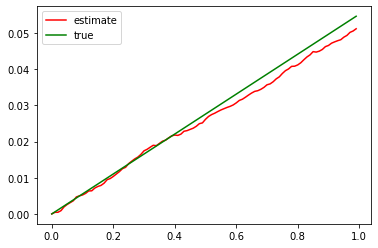

In [8]:
t = jnp.arange(0, n_steps) * dt
plt.plot(t, -2 * jnp.mean(jnp.log(S), axis=0), "r", label="estimate")
plt.plot(t, xi * t, "g", label="true")
plt.legend()